In [1]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *
import timm

In [2]:
!nvidia-smi

Wed Mar  3 10:27:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:19:00.0 Off |                  N/A |
| 27%   35C    P8    24W / 250W |   9935MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 27%   36C    P8    14W / 250W |     10MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [3]:
import torch
torch.cuda.set_device(2)

In [4]:
path = Path('datasetPrueba/')
trainPath = path/'train'
testPath = path/'test'

In [5]:
def getDataBlock(presize=512,size=256):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = [Resize(presize)],
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=180,pad_mode=PadMode.Zeros), Normalize.from_stats(*imagenet_stats)])

In [6]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [7]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnet101'),
    MixUp(),
]

In [8]:
learn = timm_learner(dls512, 'resnet101d',cbs = callbacks,metrics=[accuracy,Precision(),Recall()]).to_fp16()

In [9]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.059302,0.708735,0.669282,0.829175,0.484848,00:43


Better model found at epoch 0 with valid_loss value: 0.7087350487709045.


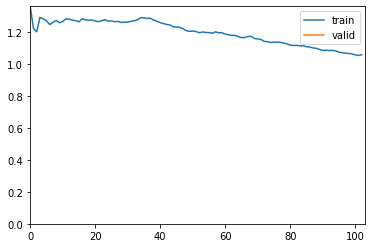

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.954168,0.708457,0.671092,0.831418,0.487093,00:52
1,0.933356,0.662199,0.680145,0.808547,0.530864,00:51
2,0.920449,0.626987,0.691611,0.800633,0.567901,00:52
3,0.894452,0.629667,0.683766,0.810491,0.537598,00:52
4,0.904759,0.620858,0.691008,0.819562,0.545455,00:51
5,0.883037,0.589836,0.702474,0.797904,0.598204,00:52
6,0.851033,0.599113,0.709716,0.838284,0.570146,00:51
7,0.853287,0.603719,0.704888,0.835000,0.562290,00:52
8,0.855000,0.591866,0.708509,0.826923,0.579125,00:52


Better model found at epoch 0 with valid_loss value: 0.7084566354751587.


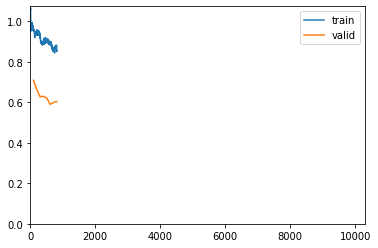

Better model found at epoch 1 with valid_loss value: 0.6621989011764526.
Better model found at epoch 2 with valid_loss value: 0.6269873976707458.
Better model found at epoch 4 with valid_loss value: 0.6208577752113342.
Better model found at epoch 5 with valid_loss value: 0.5898364186286926.
No improvement since epoch 5: early stopping


In [10]:
learn.fine_tune(100,base_lr=1e-4)

In [11]:
path = Path('dataset/')
trainPath = path/'train'
testPath = path/'test'

In [12]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [13]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [14]:
learn.freeze()

In [15]:
learn.dls=dls512

In [16]:
#learn.load('hrnet')

In [17]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.238910,0.904757,0.542813,0.538776,0.415094,00:19


Better model found at epoch 0 with valid_loss value: 0.9047566652297974.


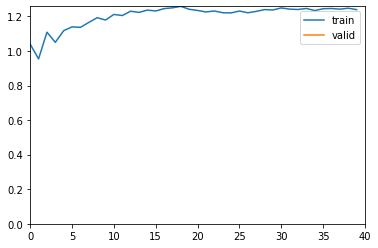

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.202372,0.917607,0.539755,0.536481,0.393082,00:22
1,1.185270,0.898386,0.551988,0.552743,0.411950,00:22
2,1.223080,0.882230,0.556575,0.556911,0.430818,00:22
3,1.208267,0.870724,0.548930,0.542751,0.459119,00:22
4,1.204903,0.881360,0.553517,0.550388,0.446541,00:22
5,1.199225,0.878148,0.545872,0.542857,0.418239,00:21
6,1.185516,0.864549,0.551988,0.549407,0.437107,00:22
7,1.205539,0.895455,0.542813,0.545455,0.358491,00:22
8,1.193861,0.859629,0.568807,0.578261,0.418239,00:21
9,1.210519,0.844380,0.561162,0.561753,0.443396,00:22


Better model found at epoch 0 with valid_loss value: 0.9176071286201477.


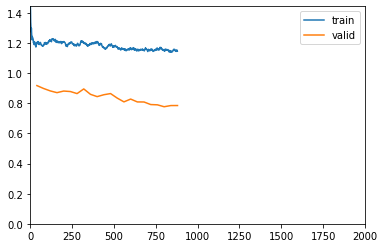

Better model found at epoch 1 with valid_loss value: 0.8983857035636902.
Better model found at epoch 2 with valid_loss value: 0.8822302222251892.
Better model found at epoch 3 with valid_loss value: 0.8707240223884583.
Better model found at epoch 6 with valid_loss value: 0.864548921585083.
Better model found at epoch 8 with valid_loss value: 0.8596287369728088.
Better model found at epoch 9 with valid_loss value: 0.8443796634674072.
Better model found at epoch 12 with valid_loss value: 0.8345127701759338.
Better model found at epoch 13 with valid_loss value: 0.8095048069953918.
Better model found at epoch 15 with valid_loss value: 0.809182345867157.
Better model found at epoch 16 with valid_loss value: 0.8087088465690613.
Better model found at epoch 17 with valid_loss value: 0.7917178273200989.
Better model found at epoch 18 with valid_loss value: 0.7899392247200012.
Better model found at epoch 19 with valid_loss value: 0.7772377729415894.
No improvement since epoch 19: early stopping


In [18]:
learn.fine_tune(50,base_lr=1e-5)

In [19]:
learn.dls = dlsTest

In [20]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5550122261047363.


(#4) [0.8139533400535583,0.5550122261047363,0.6126984126984127,0.4436781609195402]